## International Travel

#### Jacqueline Pan

#### Final Project for Data Bootcamp, Fall 2017

<div class="inline-block"> <img src="https://images.pexels.com/photos/592753/pexels-photo-592753.jpeg?w=940&h=650&dpr=2&auto=compress&cs=tinysrgb" style="width: 1000px;"/> </div> 

Since the term’s conception in the early 1800s and its development into an absolutely massive industry by the mid-1900s, tourism has grown tremendously both in numbers and in reach. However, by now, the word ‘tourist’ has taken on somewhat of a negative connotation, with many people (at least in the younger generations) preferring to self-identify as ‘travellers’. 

I have the impression that in recent years, the trend of travel has been shifting towards more unorthodox or unique countries (i.e. Iceland, Morocco, Thailand), as opposed to the traditionally popular tourist destinations (i.e. US, Italy, France). However, given that tourism rates have been growing in general, I don't know if the increased inbound traffic is actually higher, or if it's been growing at the same (or similar) rate for all countries. Thus, I'd like to look into this, as well as potential reasons for uneven growth. 

I personally feel that it may be in part due to a cultural shift in mindset, which is not quantifiable; so I will be looking at GDP per capita, as an indicator of standard of living in countries. Accessibility is definitely a factor in travel, and places that are easy to get to (as well as sightsee in) are likely to have higher tourism rates. This project will include combining inbound tourism data with GDP per capita to match up with each destination, as well as using the data to calculate relative change to see if certain countries have become significantly more (or less) popular.

### Data Report

I downloaded three datasets from DataMarket: `International tourism, number of arrivals`,  `GDP per capita (current US$)`, and `World population by country`.

link to data: [http://data.is/2C7HuOs](http://data.is/2C7HuOs)

This can be done easily by going through the three tabs at the top left:
1. `Select`: adding the relevant dataset
2. `Display`: setting the year range from 1995-2015
3. `Export`: saving the data as a csv file

Then, repeat for the other datasets.

I also grabbed a dataset that categorised each country by continent. 

link to data: [https://old.datahub.io/dataset/countries-continents/resource/aa08c34c-57e8-4e15-bd36-969bee26aba5](https://old.datahub.io/dataset/countries-continents/resource/aa08c34c-57e8-4e15-bd36-969bee26aba5)

### Importing the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os

file1 = 'international-tourism-no-arrivals.csv'
file2 = 'gdp_per_capita_usd.csv'
file3 = 'world-population-by-country.csv'
file4 = 'countries-continents.csv'
cwd  = '/Users/jackie/Desktop/nyu/sr/fall2017/data_bootcamp'

os.chdir(cwd)                                 
print('Current working directory is', os.getcwd())
print('File1 exists?', os.path.isfile(file1))
print('File2 exists?', os.path.isfile(file2))
print('File3 exists?', os.path.isfile(file3))
print('File4 exists?', os.path.isfile(file4))

arrivals = pd.read_csv(file1)
gdp_pc = pd.read_csv(file2)
population = pd.read_csv(file3)
continents = pd.read_csv(file4)

Current working directory is /Users/jackie/Desktop/nyu/sr/fall2017/data_bootcamp
File1 exists? True
File2 exists? True
File3 exists? True
File4 exists? True


We're all set! Now let's get these in working condition.

### Cleaning the data

This is how the data looks as of now.

In [97]:
arrivals.head()

,Year,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
0,1995,304000,520000.0,34000.0,NaN,9000.0,220000.0,2289000.0,12000.0,619000.0,...,2022000.0,92000.0,44000.0,700000.0,1351000.0,454000.0,NaN,61000.0,163000.0,1416000.0
1,1996,287000,605000.0,35000.0,NaN,21000.0,228000.0,2614000.0,13000.0,641000.0,...,2152000.0,173000.0,46000.0,759000.0,1607000.0,373000.0,220000.0,74000.0,264000.0,1597000.0
2,1997,119000,635000.0,26000.0,NaN,45000.0,240000.0,2764000.0,23000.0,650000.0,...,2316000.0,960000.0,50000.0,814000.0,1716000.0,393000.0,210000.0,80000.0,341000.0,1336000.0
3,1998,184000,678000.0,36000.0,NaN,52000.0,234000.0,3012000.0,32000.0,647000.0,...,2163000.0,811000.0,52000.0,685000.0,1520000.0,422000.0,200000.0,88000.0,362000.0,2090000.0
4,1999,371000,749000.0,41000.0,2347000.0,45000.0,232000.0,2898000.0,41000.0,683000.0,...,2073000.0,487000.0,51000.0,587000.0,1782000.0,484000.0,300000.0,58000.0,404000.0,2250000.0


To transform the datasets into the format I want, I'll splice out each year that I want, transmute it (so that the countries are the index and the years are the columns), and turn the data into floating point numbers.

In [4]:
#flipping axes of arrivals dataset and slicing data from 1995
arrivals1995 = arrivals[0:1].T.astype(float)

#renaming the column:
arrivals1995.columns = ['arrivals']

arrivals1995 = arrivals1995.iloc[1:]
arrivals1995.head()

,arrivals
Albania,304000.0
Algeria,520000.0
American Samoa,34000.0
Andorra,NaN
Angola,9000.0


I will do the same with the `GDP per capita` and the `population size` datasets.

In [5]:
gdppc1995 = gdp_pc[0:1].T.astype(float)
gdppc1995.columns = ['gdp per capita']
gdppc1995 = gdppc1995.iloc[1:]

popsize1995 = population[0:1].T.astype(float)
popsize1995.columns = ['population size']
popsize1995 = popsize1995.iloc[1:]

For the `continent` dataset, the only adjustment needed is to set the index as the countries.

In [6]:
continent = continents.set_index(['Country'])
continent.columns = ['continent']

Then I will merge all of the datasets (i.e. `arrivals`, `gdp per capita`, `population size`, and `continent`) into one cross-sectional 1995 dataset.

In [7]:
results1995 = arrivals1995.join(gdppc1995).join(popsize1995).join(continent)
results1995.head()

,arrivals,gdp per capita,population size,continent
Albania,304000.0,761.0,3158154.0,Europe
Algeria,520000.0,1445.0,28321697.0,Africa
American Samoa,34000.0,NaN,NaN,NaN
Andorra,NaN,18461.0,63245.0,Europe
Angola,9000.0,353.0,10999585.0,Africa


Ta-da!

Now I will repeat all the steps, but for 20 years later, in 2015.

In [8]:
arrivals2015 = arrivals[20:21].T.astype(float)
arrivals2015.columns = ['arrivals']
arrivals2015 = arrivals2015.iloc[1:]

gdppc2015 = gdp_pc[20:21].T.astype(float)
gdppc2015.columns = ['gdp per capita']
gdppc2015 = gdppc2015.iloc[1:]

popsize2015 = population[20:21].T.astype(float)
popsize2015.columns = ['population size']
popsize2015 = popsize2015.iloc[1:]

results2015 = arrivals2015.join(gdppc2015).join(popsize2015).join(continent)
results2015.head()

,arrivals,gdp per capita,population size,continent
Albania,4131000.0,3954.0,3029278.0,Europe
Algeria,1710000.0,4133.0,39542166.0,Africa
American Samoa,20300.0,11542.0,54343.0,NaN
Andorra,2670000.0,NaN,85580.0,Europe
Angola,592000.0,3696.0,19625353.0,Africa


Let's graph!

### Graphing

I'm going to first make two side-by-side scatterplots, one from 1995 and one from 2015, to visualise the change from the 20-year span. I will graph Tourist Arrivals and GDP per capita (in log form). The size of each point will represent population size, and they will be colour-coded by continent.

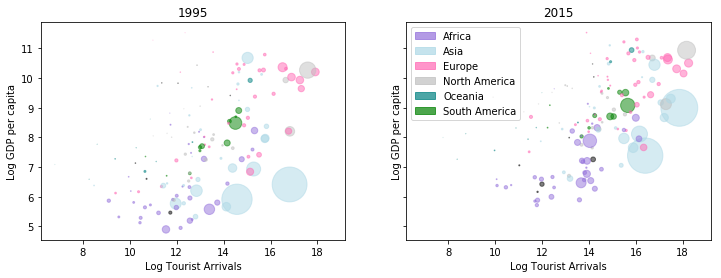

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex = True, sharey = True, figsize =(12,4))

#colour-coding by continent
cmap = {'Africa': 'mediumpurple', 'Asia': 'lightblue', 'Europe': 'hotpink', 
        'North America': 'silver', 'Oceania': 'teal', 'South America': 'green'}

#graphing on each axis
ax[0].scatter(np.log(results1995["arrivals"]),np.log(results1995["gdp per capita"]), 
              s=(results1995['population size']/1000000), alpha = 0.5,
              c = [cmap.get(c, 'black') for c in results1995.continent])
ax[1].scatter(np.log(results2015["arrivals"]),np.log(results2015["gdp per capita"]), 
              s=(results2015['population size']/1000000), alpha = 0.5,
              c = [cmap.get(c, 'black') for c in results2015.continent])

#labelling the graphs
ax[0].set_title("1995")
ax[1].set_title("2015")
ax[0].set_ylabel("Log GDP per capita") 
ax[0].set_xlabel("Log Tourist Arrivals")
ax[1].set_ylabel("Log GDP per capita") 
ax[1].set_xlabel("Log Tourist Arrivals")

#customising the legend
africa_patch = mpatches.Patch(color='mediumpurple', alpha = 0.7, label='Africa')
asia_patch = mpatches.Patch(color='lightblue', alpha = 0.7, label='Asia')
europe_patch = mpatches.Patch(color='hotpink', alpha = 0.7, label='Europe')
namerica_patch = mpatches.Patch(color='silver', alpha = 0.7, label='North America')
oceania_patch = mpatches.Patch(color='teal', alpha = 0.7, label='Oceania')
samerica_patch = mpatches.Patch(color='green', alpha = 0.7, label='South America')
plt.legend(handles=[africa_patch, asia_patch, europe_patch, namerica_patch, oceania_patch, samerica_patch])

plt.show()

As suspected, there seems to be a positive correlation between tourist arrivals and GDP per capita. The numbers for both variables have grown evidently, as the dots are shifted more up and to the right in the 2015 graph.

Just to better visualise the continent-wise division of internation travel, I'll make a simple pie chart.

I'll start by creating new dataframes summing up the numbers for each continent.

In [134]:
continent1995 = pd.DataFrame(results1995["arrivals"].groupby(results2015.continent).sum())
continent2015 = pd.DataFrame(results2015["arrivals"].groupby(results2015.continent).sum())

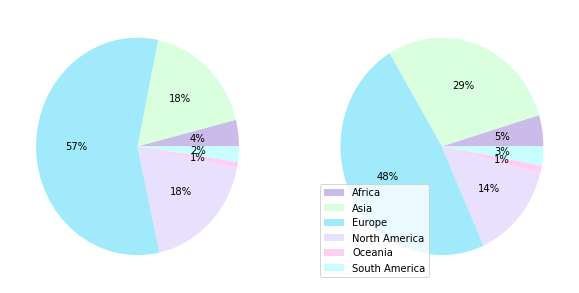

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,5))

ax[0].pie(continent1995, 
          colors = {'#A1EAFB', '#C7FEFF', '#FFCEF3', '#CABBE9', '#E9E0FE', '#D9FFDE'}, 
          autopct='%1.0f%%')
ax[1].pie(continent2015, 
          colors = {'#A1EAFB', '#C7FEFF', '#FFCEF3', '#CABBE9', '#E9E0FE', '#D9FFDE'}, 
          autopct='%1.0f%%')
plt.legend(labels = continent1995.index, loc = 'best')

plt.show()

Clearly, Europe receives a large majority of inbound traffic, though it looks like Asia grown to receive a relatively larger percent of international travel as of 2015. Africa and South America have also grown very slightly, while Europe and North America shrunk slightly.

### Time Series

Now I want to look at time series data. 

I'm going to take the panel data of tourist arrivals and splice out some countries of prime interest. To try to capture trends of recent years, I decided to look specifically at the five-year span from 2010-2015.

I'll find countries with the largest relative change by creating a new variable on the `arrivals` dataframe of the percentage change between 2010-2015, sorting by the largest values, and splicing out the top countries. I can do the same for objective change, and pick out the countries with the general largest inbound traffic by sorting by 2015's figures.

In [17]:
arrivals1 = arrivals[0:21]
arrivals2 = arrivals1.set_index(['Year'])
arrivalsclean = arrivals2.astype(float).T

In [18]:
arrivalsclean['% change'] = ((arrivalsclean['2015'] - arrivalsclean['2010'])/arrivalsclean['2010'])*100
tarrivals = arrivalsclean.sort_values('% change', ascending = False)
arrivals_biggest_rel_change = tarrivals[0:10]
arrivals_biggest_rel_change

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,% change
Myanmar,194000.0,490000.0,491000.0,478000.0,435000.0,416000.0,475000.0,487000.0,597000.0,657000.0,...,716000.0,731000.0,763000.0,792000.0,816000.0,1059000.0,2044000.0,3081000.0,4681000.0,491.035354
Cote d'Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,182000.0,205000.0,231000.0,252000.0,270000.0,289000.0,380000.0,471000.0,1441000.0,471.825397
Bhutan,4800.0,5200.0,5400.0,6200.0,7200.0,7600.0,6400.0,5600.0,6300.0,9200.0,...,21000.0,28000.0,23000.0,41000.0,66000.0,105000.0,116000.0,133000.0,155000.0,278.048780
Kyrgyz Republic,36000.0,42000.0,87000.0,59000.0,48000.0,59000.0,99000.0,140000.0,342000.0,398000.0,...,1656000.0,1844000.0,1394000.0,855000.0,2278000.0,2406000.0,3076000.0,2849000.0,3051000.0,256.842105
Georgia,85000.0,117000.0,313000.0,317000.0,384000.0,387000.0,302000.0,298000.0,313000.0,368000.0,...,1052000.0,1290000.0,1500000.0,2032000.0,2822000.0,4428000.0,5392000.0,5516000.0,5901000.0,190.403543
Guinea,NaN,12000.0,17000.0,23000.0,27000.0,33000.0,38000.0,43000.0,44000.0,45000.0,...,30000.0,24000.0,NaN,12400.0,131000.0,96000.0,56000.0,33000.0,35000.0,182.258065
Sri Lanka,403000.0,302000.0,366000.0,381000.0,436000.0,400000.0,337000.0,393000.0,501000.0,566000.0,...,494000.0,438000.0,448000.0,654000.0,856000.0,1006000.0,1275000.0,1527000.0,1798000.0,174.923547
Iceland,190000.0,201000.0,202000.0,232000.0,263000.0,303000.0,301000.0,285000.0,317000.0,360000.0,...,485000.0,502000.0,494000.0,489000.0,566000.0,673000.0,807300.0,997600.0,1289000.0,163.599182
Paraguay,438000.0,426000.0,395000.0,350000.0,269000.0,289000.0,279000.0,250000.0,268000.0,309000.0,...,416000.0,428000.0,439000.0,465000.0,524000.0,579000.0,610000.0,649000.0,1214000.0,161.075269
"Congo, Rep.",37000.0,39000.0,27000.0,20000.0,14000.0,19000.0,27000.0,22000.0,23000.0,31000.0,...,55000.0,62000.0,94000.0,101000.0,168000.0,204000.0,231000.0,273000.0,263000.0,160.396040


In [19]:
arrivals_biggest_rel_change.index

Index(['Myanmar', 'Cote d'Ivoire', 'Bhutan', 'Kyrgyz Republic', 'Georgia',
       'Guinea', 'Sri Lanka', 'Iceland', 'Paraguay', 'Congo, Rep.'],
      dtype='object')

Here we see the 10 countries that have had the greatest relative change in tourist arrivals from 2010 to 2015. (Iceland is up there!)

Now for numerical change:

In [20]:
arrivalsclean['change'] = arrivalsclean['2015'] - arrivalsclean['2010']
t2arrivals = arrivalsclean.sort_values('change', ascending = False)
arrivals_biggest_change = t2arrivals[0:10]
arrivals_biggest_change

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,% change,change
United States,43318000.0,46489000.0,47767000.0,46377000.0,48509000.0,51238000.0,46927000.0,43581000.0,41218000.0,46086000.0,...,58007000.0,55103000.0,60010000.0,62821000.0,66657000.0,69995000.0,75022000.0,77510000.0,29.161806,17500000.0
Spain,32971000.0,34027000.0,39553000.0,41892000.0,45440000.0,46403000.0,48565000.0,50331000.0,50854000.0,52430000.0,...,57192000.0,52178000.0,52677000.0,56177000.0,57464000.0,60675000.0,64939000.0,68215000.0,29.496744,15538000.0
Thailand,6952000.0,7244000.0,7294000.0,7843000.0,8651000.0,9579000.0,10133000.0,10873000.0,10082000.0,11737000.0,...,14584000.0,14150000.0,15936000.0,19230000.0,22354000.0,26547000.0,24810000.0,29923000.0,87.769829,13987000.0
Russian Federation,10290000.0,16208000.0,17463000.0,16188000.0,18820000.0,21169000.0,21595000.0,23309000.0,22521000.0,22064000.0,...,23676000.0,21339000.0,22281000.0,24932000.0,28177000.0,30792000.0,32421000.0,33729000.0,51.380100,11448000.0
Japan,3345000.0,3837000.0,4218000.0,4106000.0,4438000.0,4757000.0,4772000.0,5239000.0,5212000.0,6138000.0,...,8351000.0,6790000.0,8611000.0,6219000.0,8358000.0,10364000.0,13413000.0,19737000.0,129.206828,11126000.0
Mexico,20241000.0,21395000.0,19351000.0,19392000.0,19043000.0,20641000.0,19810000.0,19667000.0,18665000.0,20618000.0,...,22931000.0,22346000.0,23290000.0,23403000.0,23403000.0,24151000.0,29346000.0,32093000.0,37.797338,8803000.0
Greece,10130000.0,9233000.0,10070000.0,10916000.0,12164000.0,13096000.0,14057000.0,14180000.0,13969000.0,13313000.0,...,15939000.0,14915000.0,15007000.0,16427000.0,15518000.0,17920000.0,22033000.0,23599000.0,57.253282,8592000.0
Turkey,7083000.0,7966000.0,9040000.0,8960000.0,6893000.0,9586000.0,10783000.0,12790000.0,13341000.0,16826000.0,...,29792000.0,30187000.0,31364000.0,34654000.0,35698000.0,37795000.0,39811000.0,39478000.0,25.870425,8114000.0
Germany,14847000.0,15205000.0,15837000.0,16511000.0,17116000.0,18983000.0,17861000.0,17969000.0,18399000.0,20137000.0,...,24884000.0,24220000.0,26875000.0,28374000.0,30411000.0,31545000.0,32999000.0,34970000.0,30.120930,8095000.0
France,60033000.0,62406000.0,66591000.0,70109000.0,73147000.0,77190000.0,75202000.0,77012000.0,75048000.0,74433000.0,...,79218000.0,76764000.0,76647000.0,80499000.0,81980000.0,83634000.0,83701000.0,84452000.0,10.183047,7805000.0


In [22]:
arrivals_biggest_change.index

Index(['United States', 'Spain', 'Thailand', 'Russian Federation', 'Japan',
       'Mexico', 'Greece', 'Turkey', 'Germany', 'France'],
      dtype='object')

Here we see the 10 countries that have had the objectively greatest numerical change in tourist arrivals from 2010 to 2015. (Thailand is really up there!)

Lastly, for generally popular countries:

In [23]:
s2arrivals = arrivalsclean.sort_values('2015', ascending = False)
arrivalsbiggest = s2arrivals[0:10]
arrivalsbiggest

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,% change,change
France,60033000.0,62406000.0,66591000.0,70109000.0,73147000.0,77190000.0,75202000.0,77012000.0,75048000.0,74433000.0,...,79218000.0,76764000.0,76647000.0,80499000.0,81980000.0,83634000.0,83701000.0,84452000.0,10.183047,7805000.0
United States,43318000.0,46489000.0,47767000.0,46377000.0,48509000.0,51238000.0,46927000.0,43581000.0,41218000.0,46086000.0,...,58007000.0,55103000.0,60010000.0,62821000.0,66657000.0,69995000.0,75022000.0,77510000.0,29.161806,17500000.0
Spain,32971000.0,34027000.0,39553000.0,41892000.0,45440000.0,46403000.0,48565000.0,50331000.0,50854000.0,52430000.0,...,57192000.0,52178000.0,52677000.0,56177000.0,57464000.0,60675000.0,64939000.0,68215000.0,29.496744,15538000.0
China,20034000.0,22765000.0,23770000.0,25073000.0,27047000.0,31229000.0,33167000.0,36803000.0,32970000.0,41761000.0,...,53049000.0,50875000.0,55664000.0,57581000.0,57725000.0,55686000.0,55622000.0,56886000.0,2.195315,1222000.0
Italy,31052000.0,32943000.0,34692000.0,34933000.0,36516000.0,41181000.0,39563000.0,39799000.0,39604000.0,37071000.0,...,42734000.0,43239000.0,43626000.0,46119000.0,46360000.0,47704000.0,48576000.0,50732000.0,16.288452,7106000.0
Turkey,7083000.0,7966000.0,9040000.0,8960000.0,6893000.0,9586000.0,10783000.0,12790000.0,13341000.0,16826000.0,...,29792000.0,30187000.0,31364000.0,34654000.0,35698000.0,37795000.0,39811000.0,39478000.0,25.870425,8114000.0
Germany,14847000.0,15205000.0,15837000.0,16511000.0,17116000.0,18983000.0,17861000.0,17969000.0,18399000.0,20137000.0,...,24884000.0,24220000.0,26875000.0,28374000.0,30411000.0,31545000.0,32999000.0,34970000.0,30.120930,8095000.0
United Kingdom,21719000.0,22936000.0,23215000.0,23710000.0,23341000.0,23212000.0,20982000.0,22307000.0,22787000.0,25678000.0,...,30142000.0,28199000.0,28295000.0,29306000.0,29282000.0,31063000.0,32613000.0,34436000.0,21.703481,6141000.0
Russian Federation,10290000.0,16208000.0,17463000.0,16188000.0,18820000.0,21169000.0,21595000.0,23309000.0,22521000.0,22064000.0,...,23676000.0,21339000.0,22281000.0,24932000.0,28177000.0,30792000.0,32421000.0,33729000.0,51.380100,11448000.0
Mexico,20241000.0,21395000.0,19351000.0,19392000.0,19043000.0,20641000.0,19810000.0,19667000.0,18665000.0,20618000.0,...,22931000.0,22346000.0,23290000.0,23403000.0,23403000.0,24151000.0,29346000.0,32093000.0,37.797338,8803000.0


In [24]:
arrivalsbiggest.index

Index(['France', 'United States', 'Spain', 'China', 'Italy', 'Turkey',
       'Germany', 'United Kingdom', 'Russian Federation', 'Mexico'],
      dtype='object')

Lastly, here we see the top 10 most travelled-to destinations from 2015. There's a lot of overlap with countries with the biggest numerical change in the 5 years. The only 3 countries with the biggest numerical change that aren't in the top 10 destinations are Thailand, Japan, and Greece.

Now I'll combine these into one dataset comprised of the relevant countries that I'd like to see graphed over time. I'm going to drop any duplicates, from the large overlap between the numerical change and biggest destinations. I'm also going to sort the aggregate dataset by number of arrivals in 2015 (so looking at the legend, it will be easier to tell which country is which). I'll also transmute it again so that the years are the index, so I can graph it as a time series graph with the years along the x-axis.

In [29]:
td = arrivalsbiggest.append(arrivals_biggest_change)
abrc = arrivals_biggest_rel_change

td.columns = td.columns.tolist()
td2 = pd.concat([td, abrc]).drop_duplicates().sort_values('2015', ascending = False).T
#td3 = td2.sort_values('change', ascending = False)
#td4 = td3.T
timedata = td2[1:22]
timedata

,France,United States,Spain,China,Italy,Turkey,Germany,United Kingdom,Russian Federation,Mexico,...,Georgia,Myanmar,Kyrgyz Republic,Sri Lanka,Cote d'Ivoire,Iceland,Paraguay,"Congo, Rep.",Bhutan,Guinea
1995,60033000.0,43318000.0,32971000.0,20034000.0,31052000.0,7083000.0,14847000.0,21719000.0,10290000.0,20241000.0,...,85000.0,194000.0,36000.0,403000.0,NaN,190000.0,438000.0,37000.0,4800.0,NaN
1996,62406000.0,46489000.0,34027000.0,22765000.0,32943000.0,7966000.0,15205000.0,22936000.0,16208000.0,21395000.0,...,117000.0,490000.0,42000.0,302000.0,NaN,201000.0,426000.0,39000.0,5200.0,12000.0
1997,66591000.0,47767000.0,39553000.0,23770000.0,34692000.0,9040000.0,15837000.0,23215000.0,17463000.0,19351000.0,...,313000.0,491000.0,87000.0,366000.0,NaN,202000.0,395000.0,27000.0,5400.0,17000.0
1998,70109000.0,46377000.0,41892000.0,25073000.0,34933000.0,8960000.0,16511000.0,23710000.0,16188000.0,19392000.0,...,317000.0,478000.0,59000.0,381000.0,NaN,232000.0,350000.0,20000.0,6200.0,23000.0
1999,73147000.0,48509000.0,45440000.0,27047000.0,36516000.0,6893000.0,17116000.0,23341000.0,18820000.0,19043000.0,...,384000.0,435000.0,48000.0,436000.0,NaN,263000.0,269000.0,14000.0,7200.0,27000.0
2000,77190000.0,51238000.0,46403000.0,31229000.0,41181000.0,9586000.0,18983000.0,23212000.0,21169000.0,20641000.0,...,387000.0,416000.0,59000.0,400000.0,NaN,303000.0,289000.0,19000.0,7600.0,33000.0
2001,75202000.0,46927000.0,48565000.0,33167000.0,39563000.0,10783000.0,17861000.0,20982000.0,21595000.0,19810000.0,...,302000.0,475000.0,99000.0,337000.0,NaN,301000.0,279000.0,27000.0,6400.0,38000.0
2002,77012000.0,43581000.0,50331000.0,36803000.0,39799000.0,12790000.0,17969000.0,22307000.0,23309000.0,19667000.0,...,298000.0,487000.0,140000.0,393000.0,NaN,285000.0,250000.0,22000.0,5600.0,43000.0
2003,75048000.0,41218000.0,50854000.0,32970000.0,39604000.0,13341000.0,18399000.0,22787000.0,22521000.0,18665000.0,...,313000.0,597000.0,342000.0,501000.0,NaN,317000.0,268000.0,23000.0,6300.0,44000.0
2004,74433000.0,46086000.0,52430000.0,41761000.0,37071000.0,16826000.0,20137000.0,25678000.0,22064000.0,20618000.0,...,368000.0,657000.0,398000.0,566000.0,NaN,360000.0,309000.0,31000.0,9200.0,45000.0


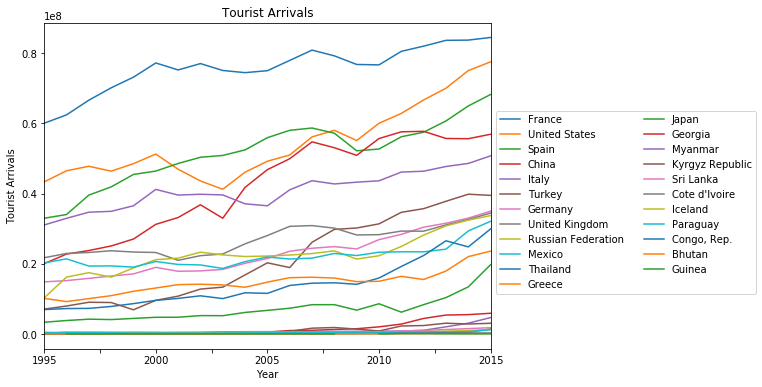

In [30]:
fig, ax = plt.subplots(figsize =(8,6))

timedata.plot(ax = ax)

#making it look nice
ax.legend(loc='center left', ncol =2, bbox_to_anchor=(1, 0.45))
ax.set_title("Tourist Arrivals") 
ax.set_xlabel("Year")
ax.set_ylabel("Tourist Arrivals")

plt.show()

Looking at the graph, the countries with the largest relative change still have very low numbers relative to long-standing top destinations like France and the States. Graphically it becomes very clear just how much lower they are. 

There is an evident dip around 2003 in the States' and China's numbers -- this may coincide with effects from the dot-com bubble. There's also another slight slump circa-2008 with France, the States, China, and Spain's numbers most visibly dipping, which is most likely correlated with the financial crisis. 

Because there are quite a few countries countries with arrival numbers on the lower end, the lines are clustered together, making it difficult to discern individual patterns.

### Conclusion

As expected, countries such as France and the States dominate international travel. There was a positive correlation between GDP per capita and tourist arrivals, which may partially explain why certain countries receive more inbound traffic. Since countries with high GDPs are generally highly developed, it makes sense that they are popular, since they're easy to get to and comfortable to stay in.  

However, there have been some interesting changes as well. While the countries that I've noticed becoming more popular of late don't even come close to the numbers of the top destinations, there are some countries that have received a lot more arrivals. Just by looking at the line graph, some notable countries are China, Turkey, and Spain, which have all had considerable growth from 1995 to 2015. 

I'd be interested in seeing if any country does manage to overtake France in the future -- it has remained the top destination for 20 years (but nothing can stay fashionable forever, I suppose)! It's worth mentioning that I do live in a big city which is neither representative of the entire country nor of the world, so my perception of which countries are becoming popular destinations are founded on a singular sample. 

Much of the overall growth in tourism over the past few decades can be connected to globalisation making travel more accessible and far-reaching. I hope that travel will continue expanding in all corners of the world, creating more cultured and educated global citizens, and creating a sense of community that stretches around the globe.